In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" abstracts that have been separated using TM (NMF)
#2012 abstracts considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/full_dictionary.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/relevant_abstracts"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/replacement.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} abstracts after TM".format(len(doc_list)))

We have a total of 2012 abstracts after TM


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [11]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('cingulate cortex', 148), ('thalamus', 141), ('default mode network', 79), ('dorsolateral prefrontal cortex', 66), ('cuneus', 61), ('precuneus', 58), ('insular cortex', 58), ('cerebellum', 51), ('hippocampus', 27), ('crus', 24), ('cerebral cortex', 23), ('anterior cingulate', 23), ('posterior cingulate', 22), ('premotor cortex', 19), ('amygdala', 17), ('primary motor cortex', 16), ('orbitofrontal', 13), ('reticular activating system', 11), ('angular gyrus', 10), ('inferior frontal gyrus', 9), ('inferior parietal lobule', 9), ('caudate nucleus', 7), ('pallidum', 7), ('superior temporal gyrus', 7), ('middle frontal gyrus', 5), ('fusiform gyrus', 4), ('postcentral gyrus', 4), ('supramarginal gyrus', 4), ('temporal pole', 4), ('parahippocampus', 4), ('superior parietal lobule', 3), ('primary somatosensory cortex', 3), ('piriform cortex', 3), ('primary visual cortex', 3), ('subgenual area', 3), ('superior frontal', 3), ('lingual gyrus', 3), ('supplementary motor cortex', 3), ('pr

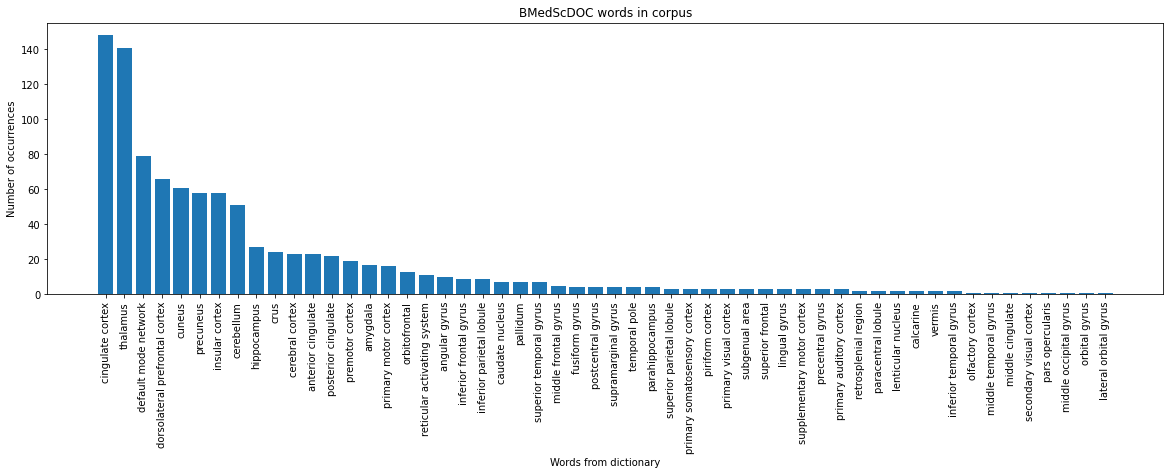

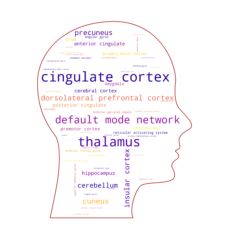

In [12]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)